### Marketing Campaign

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("campaign.csv")
df.sample(10)

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,os,city,adSpacePrimaryThematic,deviceReferrer,formatId,containerId,advertiserId,creativeId,click,conversion
367148,1493382689,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Paris,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
486129,1493392650,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Quincieux,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
931763,1493420396,23.469,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Amfreville-les-champs,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
841440,1493415077,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Paris,NEWS,other,111,8338,310,24595,0,0
670663,1493404041,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Paris,SOCIETY,other,111,8338,310,24595,0,0
93457,1493368552,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Arzay,SPORTS,other,111,8338,310,24595,0,0
312405,1493370563,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Paris,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
230066,1493361557,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Rochefort,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
142914,1493367624,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,iOS,Paris,STYLE_AND_FASHION,other,111,8338,310,24595,0,0
353525,1493376802,32.877,0.0,0.0,0.0,0.0,0.0,22.945,0.0,0.0,...,iOS,Aubervilliers,NEWS,other,111,8338,310,24595,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

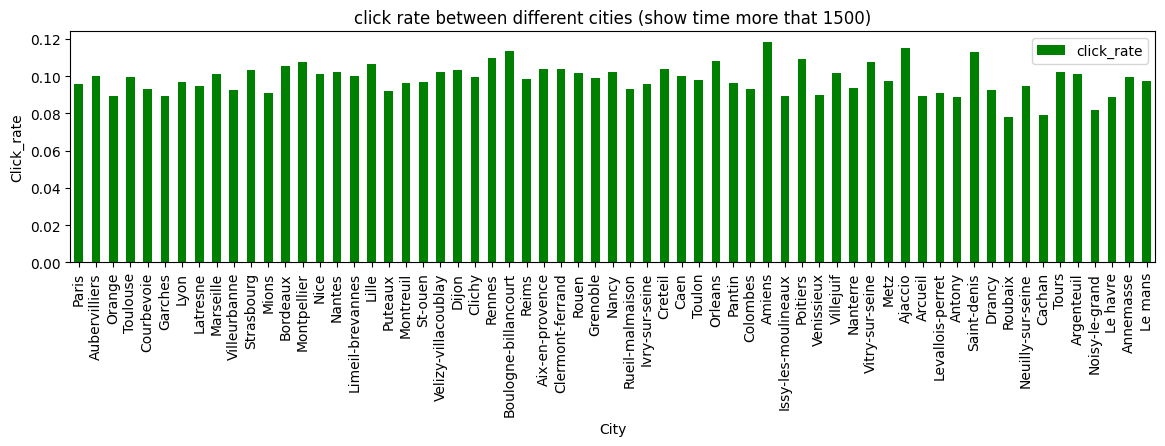

In [29]:
#create df1 as delete every columns related to previous time performance, admantx_ , device_ ,browser_ and exelate_.
#Target 1: find is there any correlation between 'city'with 'click'.

#delete columns
df1 = df.drop(df.columns[1:122], axis=1)

#after groupby print out, noticed there is sth need to be replace
df1 = df1.replace({'?':'NA'})

#groupby city wtih 1:count all  2:sum all click number
df_city_count = pd.DataFrame(df1.groupby('city')['click'].count()).rename(columns = {'click':'all_show_ofcity'})
df_city_sum = pd.DataFrame(df1.groupby('city')['click'].sum()).rename(columns = {'click':'click_percity'})

#sort for good view
df_city_count = df_city_count.sort_values(by=['all_show_ofcity'],axis=0,ascending=False)
df_city_sum = df_city_sum.sort_values(by=['click_percity'],axis=0,ascending=False)

#concat them
df_city_combine = pd.concat([df_city_count, df_city_sum],axis = 1) 
df_city_combine['click_rate'] = df_city_sum['click_percity'] / df_city_count['all_show_ofcity']

#delete all meanless rows(show time less that 1500)
df_city_combine1 = df_city_combine.where(df_city_combine['all_show_ofcity'] >= 1500 ).dropna(axis = 0)

#show the plot
df_city_combine1 = df_city_combine1.reset_index()
df_city_combine1.plot.bar('city','click_rate',title = 'click rate between different cities (show time more that 1500)',color='g')
plt.ylabel('Click_rate')
plt.xlabel('City')
plt.rcParams['figure.figsize'] = (14.0, 3.0)
plt.xticks(rotation=90)
plt.show

---

In [14]:
#It's better to def a function and then analyse the process very quickly.
#1st is function analyse click
def create_combined_click_df(df, dimension):
    #create a df,give timestamp per category of the target dimension
    dimen_count_select = df.groupby(dimension)['timestamp'].count()
    dimen_count_df = pd.DataFrame(dimen_count_select)
    dimen_count_df.rename(columns = {'timestamp':'nb_allshow'}, inplace = True)
    #create a df,give timestamp per category of the target dimension
    dimen_sur_count_select = df.groupby(dimension)['click'].sum()
    dimen_sur_count_df = pd.DataFrame(dimen_sur_count_select)
    dimen_sur_count_df.rename(columns = {'click':'nb_click'}, inplace = True)
    #concat above 2 data frames
    click_rate_df = pd.concat([dimen_count_df, dimen_sur_count_df],axis = 1) 
    click_rate_df['click_rate'] = click_rate_df['nb_click'] / click_rate_df['nb_allshow']
    #reset the index
    click_rate_df = click_rate_df.reset_index()
    #sort
    click_rate_df = click_rate_df.sort_values(by=['nb_allshow'],axis=0,ascending=False)
    return click_rate_df

#2nd is function analyse conversion
def create_combined_con_df(df, dimension):
    #create a df，give timestamp per category of the target dimension
    dimen_count_select = df.groupby(dimension)['timestamp'].count()
    dimen_count_df = pd.DataFrame(dimen_count_select)
    dimen_count_df.rename(columns = {'timestamp':'nb_allshow'}, inplace = True)
    #create a df，give timestamp per category of the target dimension
    dimen_sur_count_select = df.groupby(dimension)['conversion'].sum()
    dimen_sur_count_df = pd.DataFrame(dimen_sur_count_select)
    dimen_sur_count_df.rename(columns = {'conversion':'nb_conversion'}, inplace = True)
    #concat above 2 data frames
    con_rate_df = pd.concat([dimen_count_df, dimen_sur_count_df],axis = 1) 
    con_rate_df['conversion_rate'] = con_rate_df['nb_conversion'] / con_rate_df['nb_allshow']
    #reset the index
    con_rate_df = con_rate_df.reset_index()
    #sort
    con_rate_df = con_rate_df.sort_values(by=['nb_allshow'],axis=0,ascending=False)
    return con_rate_df


In [15]:
#Target 2, try to find the correlation between timestamp and click rate and conversion rate 

#select columns
df1 = df.iloc[:,[0,-1,-2]]

#change timestamp to real time and use a def to change them to several catagories
df1['timestamp']=pd.to_datetime(df['timestamp'],unit='s')

def time_group(times):
    times = str(times)
    if times >= '2017-04-28 05:00:00' and times <= '2017-04-28 11:00:00' :
        return '1-Morning'
    elif times <= '2017-04-28 14:00:00':
        return '2-Noon'
    elif times <= '2017-04-28 18:00:00':
        return '3-Afternoon'
    elif times <= '2017-04-28 22:00:00':
        return '4-Evening'
    else:
        return '5-Night'

df1['timestamp'] = df1['timestamp'].apply(time_group)

#use the function previews has created
df_result1 = create_combined_click_df(df1,'timestamp')
df_result2 = create_combined_con_df(df1,'timestamp')

#sort again by timestamp
df_result1 = df_result1.sort_values(by=['timestamp'],axis=0,ascending=True)
df_result2 = df_result2.sort_values(by=['timestamp'],axis=0,ascending=True)
print(df_result1)
print(df_result2)

C:\Users\Aobei\AppData\Local\Temp\ipykernel_18892\1028770893.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp']=pd.to_datetime(df['timestamp'],unit='s')
C:\Users\Aobei\AppData\Local\Temp\ipykernel_18892\1028770893.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = df1['timestamp'].apply(time_group)


     timestamp  nb_allshow  nb_click  click_rate
0    1-Morning      304565     29205    0.095891
1       2-Noon      120761     11624    0.096256
2  3-Afternoon      223389     21419    0.095882
3    4-Evening      229508     23516    0.102463
4      5-Night       84750      8962    0.105746
     timestamp  nb_allshow  nb_conversion  conversion_rate
0    1-Morning      304565            159         0.000522
1       2-Noon      120761             56         0.000464
2  3-Afternoon      223389            107         0.000479
3    4-Evening      229508             66         0.000288
4      5-Night       84750             29         0.000342


Text(0, 0.5, 'conversion rate')

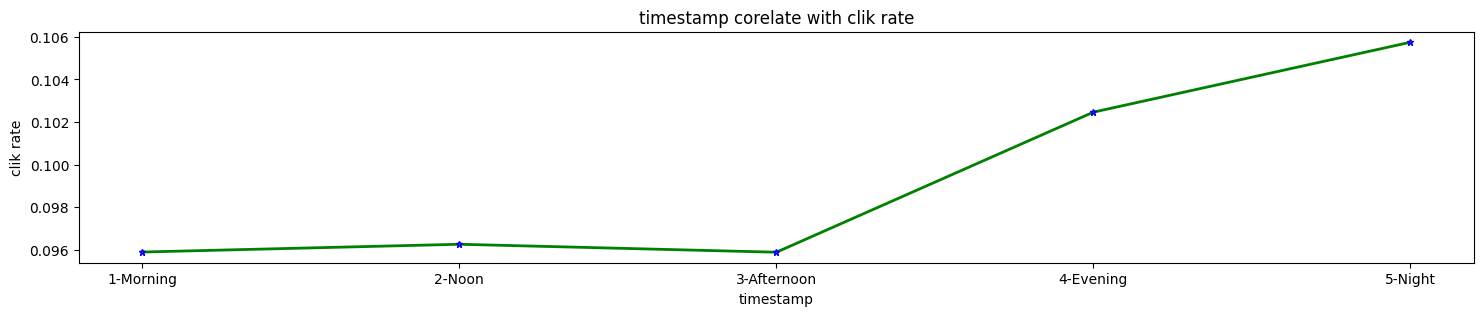

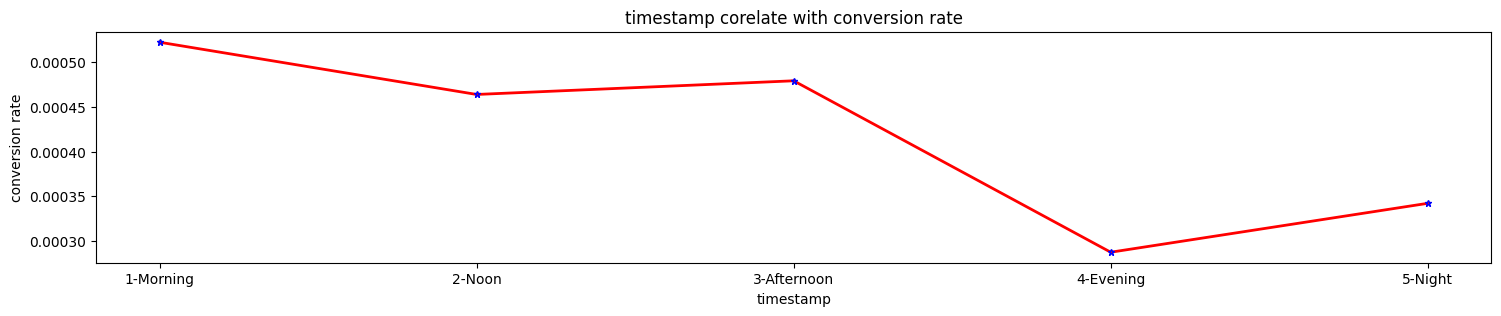

In [12]:
#create a line plot for those two dataframe
fig = plt.figure(figsize=(18,3))
plt.plot(df_result1['timestamp'],
         df_result1['click_rate'],
         linestyle = '-', 
         linewidth = 2, 
         color = 'g',
         marker = '*',
         markersize = 5,
         markeredgecolor='b',
         markerfacecolor='r') 
plt.title('timestamp corelate with clik rate')
plt.xlabel('timestamp')
plt.ylabel('clik rate')

fig = plt.figure(figsize=(18,3))
plt.plot(df_result2['timestamp'],
         df_result2['conversion_rate'],
         linestyle = '-', 
         linewidth = 2, 
         color = 'r',
         marker = '*',
         markersize = 5,
         markeredgecolor='b',
         markerfacecolor='r') 
plt.title('timestamp corelate with conversion rate')
plt.xlabel('timestamp')
plt.ylabel('conversion rate')

SO the click rate and conversion rate is both highly corelatly with timestamp, but totally different.  
In the moring, conversion rate is the highest, it's means positive corelation.   
but in midnight, click rate is highest, it's means nagetive corelation.

In [27]:
#Target 3, try to find the correlation between last24hClicks with conversion rate 

#select columns
df2 = df.loc[:,['timestamp','last24hClicks','conversion']]
#print(df1)  

#use the function previews has created
#last24hClicks vs conversion rate
df_res_24h = create_combined_con_df(df2,'last24hClicks')
print(df_res_24h)


   last24hClicks  nb_allshow  nb_conversion  conversion_rate
0              0      955062            413         0.000432
1              1        7719              4         0.000518
2              2         175              0         0.000000
3              3          17              0         0.000000


Text(0, 0.5, 'conversion rate')

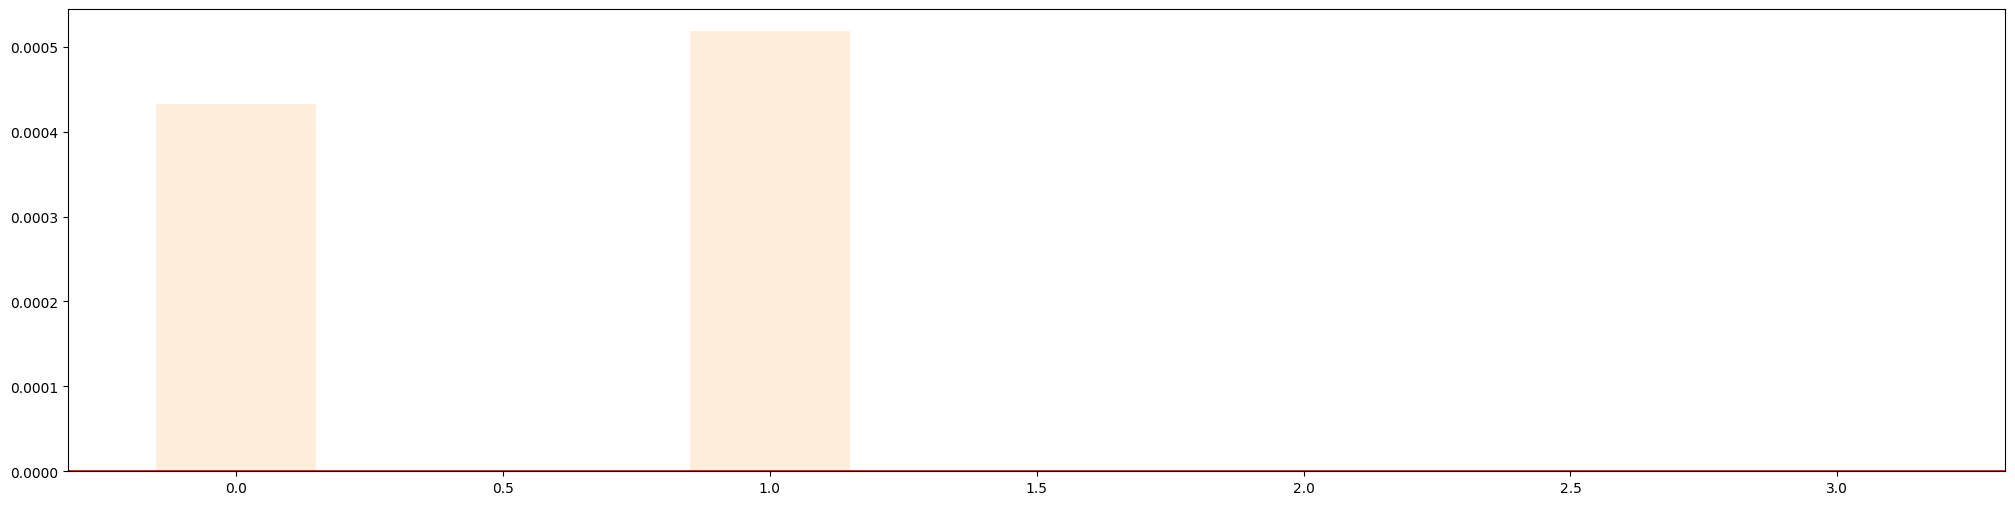

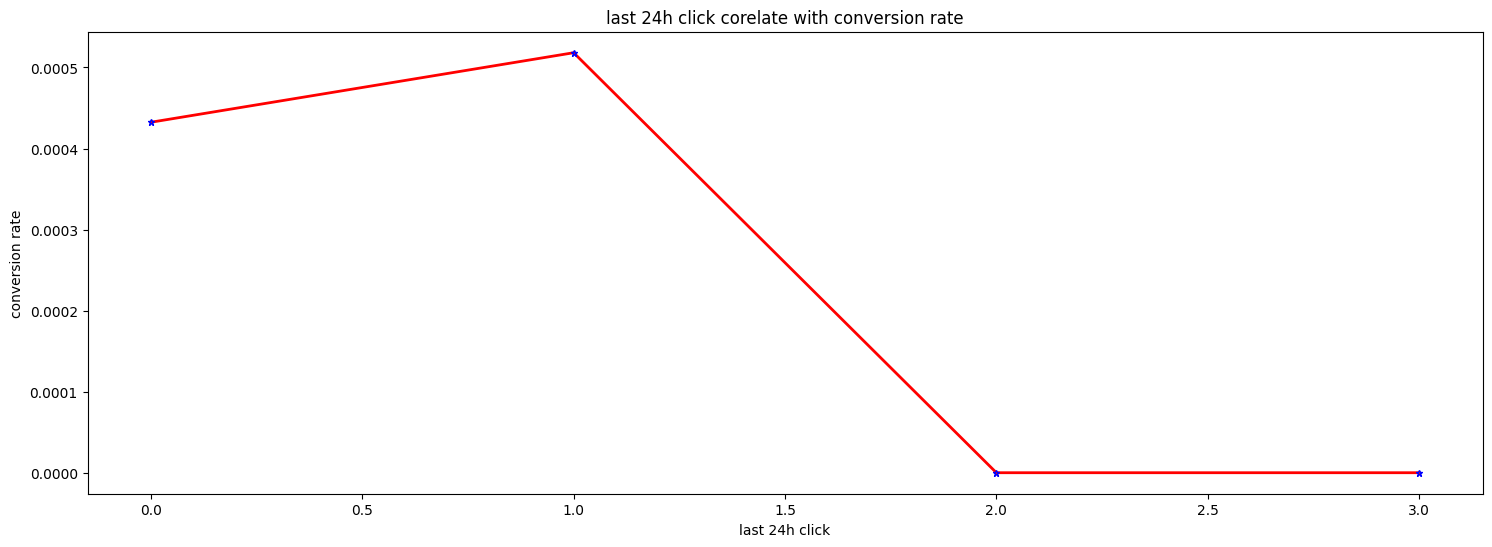

In [49]:
#visualize the dataframe
x = df_res_24h['last24hClicks']
y = df_res_24h['conversion_rate']

fig, ax = plt.subplots()
res_bar = ax.bar(x,y, 
        color='bisque',
        alpha=0.6,
        width=0.3,)
ax.axhline(y=0, color='r', linewidth=2)

fig = plt.figure(figsize=(18,6))
plt.plot(df_res_24h['last24hClicks'],
         df_res_24h['conversion_rate'],
         linestyle = '-', 
         linewidth = 2, 
         color = 'r',
         marker = '*',
         markersize = 5,
         markeredgecolor='b',
         markerfacecolor='r') 
plt.title('last 24h click corelate with conversion rate')
plt.xlabel('last 24h click')
plt.ylabel('conversion rate')
